In [1]:
import sympy as sp
from sympy import sin, cos, pi
# from sympy.interactive import printing
import pickle
import numpy as np
import scipy as sc
import scipy.interpolate
from scipy.integrate import odeint
import matplotlib.pyplot as plt

import symbtools as st
import symbtools.modeltools as mt
import symbtools.noncommutativetools as nct
import symbtools.modeltools as mt

Doppelpendel

$\varphi=0$ entspricht der oberen Ruhelage

In [2]:
t = sp.Symbol('t')
Np = 1
Nq = 1
n = Np + Nq
# pp = st.symb_vector("p1:{0}".format(Np+1))
# qq = st.symb_vector("q1:{0}".format(Nq+1))
# aa = st.symb_vector("a1:{0}".format(Nq+1))
# ww = st.symb_vector("w1:{0}".format(Nq+1))

# ttheta = st.row_stack(pp, qq) ##:T
# tthetadd = st.time_deriv(ttheta, ttheta, order=2) ##:T
# st.make_global(ttheta, tthetad)
x1, x2, x3, x4 = xx = sp.symbols("x1, x2, x3, x4")
ttheta = st.row_stack(x1, x2)
tthetad = st.time_deriv(ttheta, ttheta) ##:T
tau = sp.symbols("tau")

In [3]:
params = sp.symbols('m1, m2, l1, g, s1, s2, J1, J2') # m1 wagen, m2 pole
st.make_global(params)

In [4]:
#Einheitsvektoren
ex = sp.Matrix([1,0])
ey = sp.Matrix([0,1])


# Koordinaten der Schwerpunkte und Gelenke
S1 = mt.Rz(x1) * (-ey) * s1
G1 = mt.Rz(x1) * (-ey) * l1  # "elbow joint"
S2 = G1 + mt.Rz(x2 + x1) * (-ey) * s2
G2 = G1 + mt.Rz(x2 + x1) * (-ey) * l1

# Zeitableitungen der Schwerpunktskoordinaten
Sd1, Sd2 = st.col_split(st.time_deriv(st.col_stack(S1, S2), ttheta))

In [5]:
G1

Matrix([
[ l1*sin(x1)],
[-l1*cos(x1)]])

In [6]:
G2

Matrix([
[ l1*sin(x1) + l1*sin(x1 + x2)],
[-l1*cos(x1) - l1*cos(x1 + x2)]])

In [7]:
# Energie
T_rot = (J1 * x3**2) / 2 + (J2 * (x4 + x3) ** 2) / 2
T_trans = (m1 * Sd1.T * Sd1 + m2 * Sd2.T * Sd2) / 2

T = T_rot + T_trans[0]

V = m1 * g * S1[1] + m2 * g * S2[1]

In [8]:
T

J1*x3**2/2 + J2*(x3 + x4)**2/2 + m1*s1**2*xdot1**2*sin(x1)**2/2 + m1*s1**2*xdot1**2*cos(x1)**2/2 + m2*(l1*xdot1*sin(x1) + s2*(xdot1 + xdot2)*sin(x1 + x2))**2/2 + m2*(l1*xdot1*cos(x1) + s2*(xdot1 + xdot2)*cos(x1 + x2))**2/2

In [9]:
V

-g*m1*s1*cos(x1) + g*m2*(-l1*cos(x1) - s2*cos(x1 + x2))

In [10]:
mod = mt.generate_symbolic_model(T, V, ttheta, [0, tau])

In [11]:
mod.calc_state_eq(simplify=True)

In [12]:
mod.state_eq

Matrix([
[                                                                                                                                                                                                                                                                                                                                          xdot1],
[                                                                                                                                                                                                                                                                                                                                          xdot2],
[                                                                  (-g*l1*m2*sin(x1) - g*m1*s1*sin(x1) - g*m2*s2*sin(x1 + x2) + 2*l1*m2*s2*xdot1*xdot2*sin(x2) + l1*m2*s2*xdot2**2*sin(x2))/(l1**2*m2*sin(x2)**2 + m1*s1**2) - (l1*cos(x2) + s2)*(-g*m2*s2*sin(x1 + x2) - l1*m2*s2*xdot1**2*sin(x2) + tau)/(s2*(l1**2*m2*

In [13]:
p1, p2, p3, p4, p5, p6 = pp = sp.var("p1, p2, p3, p4, p5, p6")

In [14]:
pdot56 = mod.state_eq.subs([(sp.sin(x1), p1), (sp.cos(x1), -p2), (sp.sin(x2), p3), (sp.cos(x2), -p4), (sp.sin(x1+x2), -p1*p4-p2*p3)])[2:]
pdot = sp.Matrix([-p2*p5, p1*p5, -p4*p5, p3*p5, pdot56[0], pdot56[1]])
pdot


Matrix([
[                                                                                                                                                                                                                                                                                                     -p2*p5],
[                                                                                                                                                                                                                                                                                                      p1*p5],
[                                                                                                                                                                                                                                                                                                     -p4*p5],
[                                                                                 

In [15]:
mod.eqns

Matrix([
[g*l1*m2*sin(x1) + g*m1*s1*sin(x1) + g*m2*s2*sin(x1 + x2) + l1**2*m2*xddot1 + 2*l1*m2*s2*xddot1*cos(x2) + l1*m2*s2*xddot2*cos(x2) - 2*l1*m2*s2*xdot1*xdot2*sin(x2) - l1*m2*s2*xdot2**2*sin(x2) + m1*s1**2*xddot1 + m2*s2**2*xddot1 + m2*s2**2*xddot2],
[                                                                                                                               g*m2*s2*sin(x1 + x2) + l1*m2*s2*xddot1*cos(x2) + l1*m2*s2*xdot1**2*sin(x2) + m2*s2**2*xddot1 + m2*s2**2*xddot2 - tau]])

In [16]:
mod.calc_state_eq(simplify=True)
sp.simplify(mod.state_eq)

Matrix([
[                                                                                                                                                                                                                                                                                                         xdot1],
[                                                                                                                                                                                                                                                                                                         xdot2],
[                                                              (s2*(-g*l1*m2*sin(x1) - g*m1*s1*sin(x1) - g*m2*s2*sin(x1 + x2) + 2*l1*m2*s2*xdot1*xdot2*sin(x2) + l1*m2*s2*xdot2**2*sin(x2)) + (l1*cos(x2) + s2)*(g*m2*s2*sin(x1 + x2) + l1*m2*s2*xdot1**2*sin(x2) - tau))/(s2*(l1**2*m2*sin(x2)**2 + m1*s1**2))],
[(m2*s2*(l1*cos(x2) + s2)*(g*l1*m2*sin(x1) + g*m1*s1*sin(x1) + g*m2*s2*si

In [17]:
# Parameterwerte
parameter_values = [(g, 9.81), (l1, .5), (J1, 1/150), (J2, 1/75), (m1, 1), (m2, 1), (s1, 0.25), (s2, 0.25), (tau, 0), (tthetad[0], x3), (tthetad[1], x4)]

In [18]:
pdot.subs(parameter_values)

Matrix([
[                                                                                                                                                                                                             -p2*p5],
[                                                                                                                                                                                                              p1*p5],
[                                                                                                                                                                                                             -p4*p5],
[                                                                                                                                                                                                              p3*p5],
[                       -4.0*(0.25 - 0.5*p4)*(2.4525*p1*p4 + 2.4525*p2*p3 - 0.125*p3*x3**2)/(0.25*p3**2 + 0.0625) + (2.4525*p1*p4 -

In [19]:
f = mod.state_eq.subs(parameter_values)
f

Matrix([
[                                                                                                                                                                                                                                         x3],
[                                                                                                                                                                                                                                         x4],
[                           -4.0*(-0.125*x3**2*sin(x2) - 2.4525*sin(x1 + x2))*(0.5*cos(x2) + 0.25)/(0.25*sin(x2)**2 + 0.0625) + (0.25*x3*x4*sin(x2) + 0.125*x4**2*sin(x2) - 7.3575*sin(x1) - 2.4525*sin(x1 + x2))/(0.25*sin(x2)**2 + 0.0625)],
[16.0*(-0.125*x3**2*sin(x2) - 2.4525*sin(x1 + x2))*(0.25*cos(x2) + 0.375)/(0.25*sin(x2)**2 + 0.0625) - 4.0*(0.5*cos(x2) + 0.25)*(0.25*x3*x4*sin(x2) + 0.125*x4**2*sin(x2) - 7.3575*sin(x1) - 2.4525*sin(x1 + x2))/(0.25*sin(x2)**2 + 0.0625)]])

In [20]:
mod.calc_coll_part_lin_state_eq(simplify=True)

In [21]:
mod.ff

Matrix([
[                                                                                                                                                                         xdot1],
[                                                                                                                                                                         xdot2],
[(-g*l1*m2*sin(x1) - g*m1*s1*sin(x1) - g*m2*s2*sin(x1 + x2) + 2*l1*m2*s2*xdot1*xdot2*sin(x2) + l1*m2*s2*xdot2**2*sin(x2))/(l1**2*m2 + 2*l1*m2*s2*cos(x2) + m1*s1**2 + m2*s2**2)],
[                                                                                                                                                                             0]])

In [22]:
mod.gg

Matrix([
[                                                                             0],
[                                                                             0],
[-m2*s2*(l1*cos(x2) + s2)/(l1**2*m2 + 2*l1*m2*s2*cos(x2) + m1*s1**2 + m2*s2**2)],
[                                                                             1]])

In [23]:
h = x3
st.lie_deriv(h, f, xx, order=0)

x3

In [24]:
# Obervability
N = 5
h = x3
lie = []
for i in range(N):
    lie.append(st.lie_deriv(h, f, xx, order=i))
Q = sp.Matrix(lie).jacobian(xx)
print(st.generic_rank(Q))
Q

/home/julius/anaconda3/envs/obs/lib/python3.9/site-packages/symbtools/core.py:3251: UserWarning: There are Float-Objects contained in the matrix. They are converted to rationals.To make sure that no harm is done, the data should be converted before passingto this function. you can use e.g. rationalize_all_numbers().
  warnings.warn(msg, UserWarning)


4


Matrix([
[                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [25]:
st.generic_rank(mod.ff)

1

In [26]:
# Obervability
N = 5
h1 = x3
h2 = x4
lie = []
for i in range(N):
    lie.append(st.lie_deriv(h1, f, xx, order=i))
    lie.append(st.lie_deriv(h2, f, xx, order=i))
Q = sp.Matrix(lie)
print(st.generic_rank(Q))
Q

1


Matrix([
[                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [27]:
rhs = sp.lambdify([x1, x2, x3, x4], mod.state_eq.subs(parameter_values))

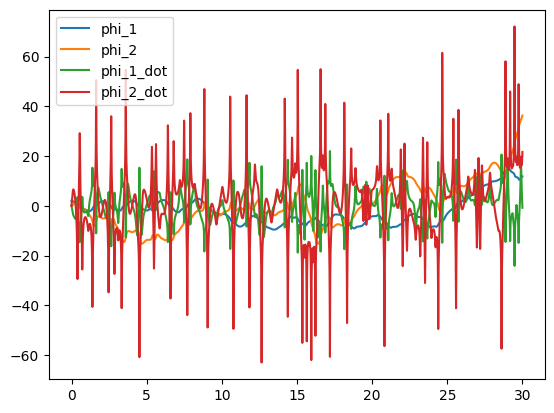

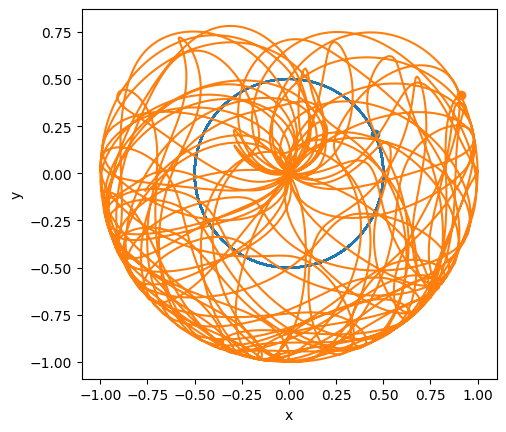

In [28]:
from scipy.integrate import solve_ivp
def rhs_wrapped(t, state):
    return rhs(*state).reshape(4)
tend = 30
tt = np.linspace(0, tend, 6000)
xx0 = [2, 0, 0, 0]
s = solve_ivp(rhs_wrapped, (0, tend), xx0, t_eval=tt)
labels = ["phi_1", "phi_2", "phi_1_dot", "phi_2_dot"]
for i in range(4):
    plt.plot(s.t, s.y[i], label=labels[i])
plt.legend()

# inner arm G1
G1_sub = G1.subs(parameter_values)
G1f = sp.lambdify(ttheta, G1_sub)
data = G1f(s.y[0],s.y[1])[:,0,:]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_aspect('equal', 'box')
ax.plot(*data, color="tab:blue")
ax.scatter(*data[:,0], color="tab:blue")
ax.set_xlabel("x")
ax.set_ylabel("y")

# outer arm G2
G2_sub = G2.subs(parameter_values)
G2f = sp.lambdify(ttheta, G2_sub)
data = G2f(s.y[0],s.y[1])[:,0,:]

ax.plot(*data, color="tab:orange")
ax.scatter(*data[:,0], color="tab:orange")
ax.set_xlabel("x")
ax.set_ylabel("y")



plt.show()

In [33]:
from scipy.integrate import solve_ivp
rhs6 = sp.lambdify(pp, pdot.subs(parameter_values))
def rhs_wrapped(t, state):
    return rhs6(*state).reshape(len(state))
tend = 30
tt = np.linspace(0, tend, 6000)
xx0 = [2, 0, 0, 0]
pp0 = [np.sin(xx0[0]), -np.cos(xx0[0]), np.sin(xx0[1]), -np.cos(xx0[1]), xx0[2], xx0[3]]
s = solve_ivp(rhs_wrapped, (0, tend), pp0, t_eval=tt)

labels = ["sin phi_1", "cos phi_1", "sin phi_2", "cos phi_2", "phi_1_dot", "phi_2_dot"]
for i in range(6):
    plt.plot(s.t, s.y[i], label=labels[i])
plt.legend()
plt.show()

labels = ["phi_1", "phi_2", "phi_1_dot", "phi_2_dot"]
angle_data = [
    np.atan2(s.y[0]/s.y[1]),
    np.atan2(s.y[2]/s.y[3]),
    s.y[4],
    s.y[5]
]
for i in range(4):
    plt.plot(s.t, angle_data[i], label=labels[i])
plt.legend()
plt.show()

# inner arm G1
G1_sub = G1.subs(parameter_values)
G1f = sp.lambdify(ttheta, G1_sub)
data = G1f(angle_data[0],angle_data[1])[:,0,:]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_aspect('equal', 'box')
ax.plot(*data, color="tab:blue")
ax.scatter(*data[:,0], color="tab:blue")
ax.set_xlabel("x")
ax.set_ylabel("y")

# outer arm G2
G2_sub = G2.subs(parameter_values)
G2f = sp.lambdify(ttheta, G2_sub)
data = G2f(angle_data[0],angle_data[1])[:,0,:]

ax.plot(*data, color="tab:orange")
ax.scatter(*data[:,0], color="tab:orange")
ax.set_xlabel("x")
ax.set_ylabel("y")



plt.show()

TypeError: Cannot convert expression to float

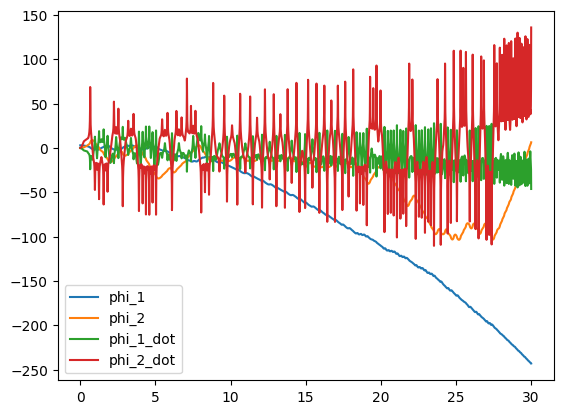

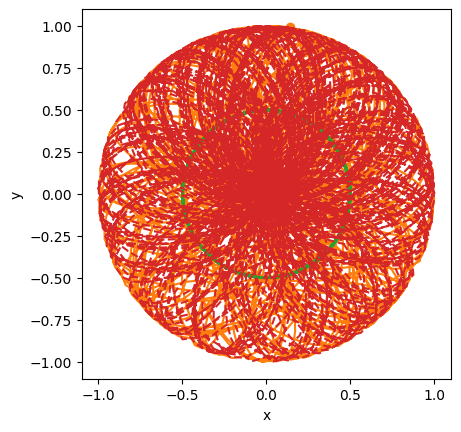

In [ ]:
from scipy.integrate import solve_ivp
def rhs_wrapped(t, state):
    # state[0:2] = state[0:2] % (np.pi*2)
    dx = rhs(*state).reshape(4)
    return dx
tend = 30
tt = np.linspace(0, tend, 6000)
xx0 = [3, 0, 0, 0]
s = solve_ivp(rhs_wrapped, (0, tend), xx0, t_eval=tt)

labels = ["phi_1", "phi_2", "phi_1_dot", "phi_2_dot"]
for i in range(4):
    plt.plot(s.t, s.y[i], label=labels[i])
plt.legend()

# inner arm G1
G1_sub = G1.subs(parameter_values)
G1f = sp.lambdify(ttheta, G1_sub)
data = G1f(s.y[0],s.y[1])[:,0,:]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_aspect('equal', 'box')
ax.plot(*data, color="tab:blue")
ax.scatter(*data[:,0], color="tab:blue")
ax.set_xlabel("x")
ax.set_ylabel("y")

# outer arm G2
G2_sub = G2.subs(parameter_values)
G2f = sp.lambdify(ttheta, G2_sub)
data = G2f(s.y[0],s.y[1])[:,0,:]

ax.plot(*data, color="tab:orange")
ax.scatter(*data[:,0], color="tab:orange")


xx1 = [3.01, 0, 0, 0]
s2 = solve_ivp(rhs_wrapped, (0, tend), xx1, t_eval=tt)

data2 = G1f(s2.y[0],s2.y[1])[:,0,:]
ax.plot(*data2, color="tab:green", linestyle="dashed")

data2 = G2f(s2.y[0],s2.y[1])[:,0,:]
ax.plot(*data2, color="tab:red", linestyle="dashed")



plt.show()

In [ ]:
i = 3
min(s.y[i]), max(s.y[i])

(-110.39213315800848, 135.90545104806844)

In [ ]:
rhs(8%(2*np.pi), 1,2,3)

array([[  2.        ],
       [  3.        ],
       [-12.95419902],
       [  4.04926898]])

In [ ]:
import pickle
with open("double_pendulum_rhs.pcl", "wb") as f:
    pickle.dump(rhs, f)

PicklingError: Can't pickle <function _lambdifygenerated at 0x7f2321d6a310>: attribute lookup _lambdifygenerated on __main__ failed